In [2]:
import numpy as np
from scipy.spatial.distance import pdist

from IPython.display import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt

%matplotlib inline

### (a)

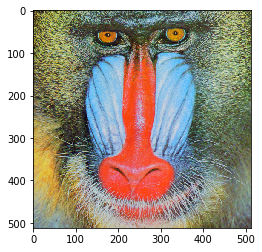

In [3]:
im_large = imread('mandrill-large.tiff')
plt.imshow(im_large)

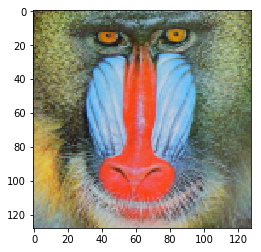

In [4]:
im_small = imread('mandrill-small.tiff')
plt.imshow(im_small)

### (b)

In [5]:
X = im_small.reshape(-1, 3)
X.shape

(16384, 3)

In [6]:
num_clusters = 16

In [19]:
def kmean(X, num_clusters=16):
    _idxes = np.random.choice(np.arange(X.shape[0]), size=num_clusters, replace=False)
    centroids = X[_idxes]
    
    err_history = []
    err = 1e6
    
    while err > 1:
        # Assign data to centroids
        dists_list = []
        for c in centroids:
            ds = np.sqrt(np.sum((X - c) ** 2, axis=1))
            dists_list.append(ds)
        assign = np.stack(dists_list).argmin(axis=0)
        
        #Update centroids
        nc_list = []
        for k in range(num_clusters):
            nc_list.append(X[np.where(assign == k)[0]].mean(axis=0))
        
        nc = np.stack(nc_list)
        err = np.sum(np.abs(nc - centroids))
        err_history.append(err)    
        centroids = nc
    return centroids, assign, err_history

In [20]:
centroids, _, err_history = kmean(X, 16)

Text(0,0.5,'error')

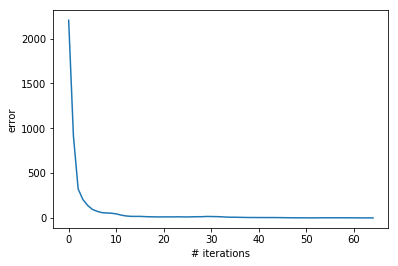

In [21]:
plt.plot(err_history)
plt.xlabel('# iterations')
plt.ylabel('error')

### (c)

In [23]:
def compress(X, centroids):
    dists_list = []
    for c in centroids:
        ds = np.sqrt(np.sum((X_large - c) ** 2, axis=1))
        dists_list.append(ds)
    assign = np.stack(dists_list).argmin(axis=0)
    
    compressed = np.zeros_like(X_large)
    for k in range(num_clusters):
        idxes = np.where(assign == k)[0]
        compressed[idxes] = centroids[k]
    return compressed

In [25]:
X_large = im_large.reshape(-1, 3)
compressed = compress(X_large, centroids)
compressed.shape

(262144, 3)

Text(0.5,1,'compressed large')

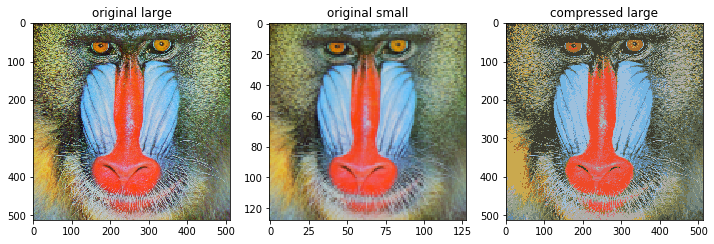

In [26]:
dim = im_large.shape[0]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax0, ax1, ax2 = axes.ravel()

ax0.imshow(im_large)
ax0.set_title('original large')
ax1.imshow(im_small)
ax1.set_title('original small')
ax2.imshow(compressed.reshape(dim, dim, 3))
ax2.set_title('compressed large')

### (d)

In original image, each pixel takes 24 bits (8 bits each channel).  
After reduce it to 16 colors, we can reduce each to pixel to 4 bits.   
Therefore, the image is compressed by  factor 6.